In [41]:
import time
import re
from selenium import webdriver
from bs4 import BeautifulSoup
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import numpy as np
from datetime import date
from lxml import html
#import pyautogui
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support import expected_conditions as EC


class MAQUINA():    
    def __init__(self, busca):

        self.busca = busca
        self.resultsDict = {\
            'nome' : [],
            'nEstrelas' : [],
            'nVotos' : [],
            'faixa de preço' : [],
            'endereço' : [],
            'site' : [],
            'fone' : [],
            'additional_info': []
        }
        self.resultsDict2 = {\
            'nome' : [],
            'data' : [],
            'eval' : []
        }
        self.wd = None
        self.iteration = 3
        self.size= 5
    def openBrowser(self):
        """
        abre o google, pesquisa pelo termo em 'busca' e clica em maps
        """

        options = webdriver.ChromeOptions()
        # INICIALIZAÇÃO DO DRIVER SELENIUM E INICIO DA BUSCA
        self.wd = webdriver.Edge(options=options)
        self.wd.get('https://www.google.com/')
        time.sleep(3)
        self.wd.maximize_window()
        time.sleep(1)
        self.wd.find_element(By.CSS_SELECTOR, '#APjFqb').send_keys(self.busca)#.send_keys(Keys.RETURN)
        time.sleep(1)
        self.wd.find_element(By.CSS_SELECTOR, '#APjFqb').send_keys(Keys.RETURN)
        time.sleep(2)
        self.wd.find_element(By.PARTIAL_LINK_TEXT, 'Maps').click()
        time.sleep(2)
    def makeSoup(self):
        """
        constrói a sopa do beautifulsoup
        """
        soup = BeautifulSoup(self.wd.page_source, 'html.parser')
    def scrollDown(self):
        #scroll down na pagina
        for i in range(3):
            elemento_scroll = self.wd.find_element(By.XPATH, '/html/body/div[2]/div[3]/div[8]/div[9]/div/div/div[1]/div[2]/div/div[1]/div/div/div[1]/div[1]')
            elemento_scroll.send_keys(Keys.END)
            WebDriverWait(self.wd, 20).until(
                lambda x: x.execute_script("return document.readyState") == "complete")
            time.sleep(2)
            #print('esperou')
    def crawl(self):

        #EXECUTA A EXTRAÇÃO DOS DADOS CLICANDO NOS ITENS DA LISTA 1 A 1
        for element in range(self.size, 3, -2):

            try:

                # Localizar o elem}ento pai que possui o scroll
                elemento_pai = self.wd.find_element(By.XPATH, '/html/body/div[2]/div[3]/div[8]/div[9]/div/div/div[1]/div[2]/div/div[1]/div/div/div[1]/div[1]')
                # Localizar o subelemento para o qual você deseja rolar
                subelemento = elemento_pai.find_element(By.XPATH, f'/html/body/div[2]/div[3]/div[8]/div[9]/div/div/div[1]/div[2]/div/div[1]/div/div/div[1]/div[1]/div[{element}]')
                # Rolar até o subelemento usando JavaScript
                self.wd.execute_script("arguments[0].scrollTop = arguments[1].offsetTop;", elemento_pai, subelemento)
                time.sleep(1)
                #abre o menu suspenso do local
                self.wd.find_element(By.XPATH, f'/html/body/div[2]/div[3]/div[8]/div[9]/div/div/div[1]/div[2]/div/div[1]/div/div/div[1]/div[1]/div[{element}]/div').click()
                #atualiza a sopa de letrinhas
                #espera até carregar aquela bosta
                WebDriverWait(self.wd, 20).until(
                lambda x: x.execute_script("return document.readyState") == "complete")
                time.sleep(4)
                soup = BeautifulSoup(self.wd.page_source, 'html.parser')
                # Converter o objeto BeautifulSoup para um objeto lxml
                root = html.fromstring(str(soup))
                #população do dict
                try:
                    self.resultsDict2['nome'].append(root.xpath('//*[@id="QA0Szd"]/div/div/div[1]/div[3]/div/div[1]/div/div/div[2]/div[2]/div/div[1]/div[1]/h1/text()')[0])
                except:
                    self.resultsDict2['nome'].append('não encontrado')
                try:
                    self.resultsDict2['data'].append(self.wd.find_element(By.XPATH, '/html/body/div[2]/div[3]/div[8]/div[9]/div/div/div[1]/div[3]/div/div[1]/div/div/div[2]/div[7]').text.split('\n'))
                except:
                    self.resultsDict2['data'].append('não encontrado')
                try:
                    self.resultsDict2['eval'].append(self.wd.find_element(By.XPATH, '/html/body/div[2]/div[3]/div[8]/div[9]/div/div/div[1]/div[3]/div/div[1]/div/div/div[2]/div[23]/div/div[2]').text.replace(',', '.').split('\n'))
                except:
                    self.resultsDict2['eval'].append('não encontrado')

            #se nao carregar o próximo, tenta carregar mais a pagina
            except: self.iteration = element

        return pd.DataFrame(self.resultsDict2)
    def crawl2(self):

        #EXECUTA A EXTRAÇÃO DOS DADOS CLICANDO NOS ITENS DA LISTA 1 A 1
        for element in range(self.size, 3, -2):

            try:
                # Localizar o elemento pai que possui o scroll
                elemento_pai = self.wd.find_element(By.XPATH, '/html/body/div[2]/div[3]/div[8]/div[9]/div/div/div[1]/div[2]/div/div[1]/div/div/div[1]/div[1]')
                # Localizar o subelemento para o qual você deseja rolar
                subelemento = elemento_pai.find_element(By.XPATH, f'/html/body/div[2]/div[3]/div[8]/div[9]/div/div/div[1]/div[2]/div/div[1]/div/div/div[1]/div[1]/div[{element}]')
                # Rolar até o subelemento usando JavaScript
                self.wd.execute_script("arguments[0].scrollTop = arguments[1].offsetTop;", elemento_pai, subelemento)
                time.sleep(0.5)

                #abre o menu suspenso do local
                self.wd.find_element(By.XPATH, f'/html/body/div[2]/div[3]/div[8]/div[9]/div/div/div[1]/div[2]/div/div[1]/div/div/div[1]/div[1]/div[{element}]').click()
                #atualiza a sopa de letrinhas
                #espera até carregar aquela bosta
                WebDriverWait(self.wd, 20).until(
                lambda x: x.execute_script("return document.readyState") == "complete")
                time.sleep(2)              
                soup1 = BeautifulSoup(self.wd.page_source, 'html.parser')
                soup = BeautifulSoup(self.wd.page_source, 'html.parser')
                # Converter o objeto BeautifulSoup para um objeto lxml
                root = html.fromstring(str(soup))
                #população do dict
                try:
                    self.resultsDict['nome'].append(root.xpath('//*[@id="QA0Szd"]/div/div/div[1]/div[3]/div/div[1]/div/div/div[2]/div[2]/div/div[1]/div[1]/h1/text()')[0])
                except:
                    self.resultsDict['nome'].append('não encontrado')
                try:
                    self.resultsDict['nEstrelas'].append(root.xpath('//*[@id="QA0Szd"]/div/div/div[1]/div[3]/div/div[1]/div/div/div[2]/div[2]/div/div[1]/div[2]/div/div[1]/div[2]/span[1]/span[1]/text()')[0])
                except:
                    self.resultsDict['nEstrelas'].append('não encontrado')
                try:
                    self.resultsDict['nVotos'].append(root.xpath('//*[@id="QA0Szd"]/div/div/div[1]/div[3]/div/div[1]/div/div/div[2]/div[2]/div/div[1]/div[2]/div/div[1]/div[2]/span[2]/span/span/text()')[0])
                except:
                    self.resultsDict['nVotos'].append('não encontrado')
                try:
                    self.resultsDict['faixa de preço'].append(root.xpath('//*[@id="QA0Szd"]/div/div/div[1]/div[3]/div/div[1]/div/div/div[2]/div[2]/div/div[1]/div[2]/div/div[1]/span/span/span/span[2]/span/span/text()')[0])
                except:
                    self.resultsDict['faixa de preço'].append('não encontrado')
                try:
                    self.resultsDict['endereço'].append(root.xpath('//*[@id="QA0Szd"]/div/div/div[1]/div[3]/div/div[1]/div/div/div[2]/div[9]/div[3]/button/div/div[2]/div[1]/text()')[0])
                except:
                    self.resultsDict['endereço'].append('não encontrado')
                try:
                    self.resultsDict['site'].append(root.xpath('//*[@id="QA0Szd"]/div/div/div[1]/div[3]/div/div[1]/div/div/div[2]/div[9]/div[5]/a/div/div[2]/div[1]/text()')[0])
                except:
                    self.resultsDict['site'].append('não encontrado')
                try:
                    self.resultsDict['fone'].append(root.xpath('//*[@id="QA0Szd"]/div/div/div[1]/div[3]/div/div[1]/div/div/div[2]/div[9]/div[6]/button/div/div[2]/div[1]/text()')[0])
                except:
                    self.resultsDict['fone'].append('não encontrado')
                try: 
                    self.resultsDict['additional_info'].append(self.wd.find_element(By.XPATH, '/html/body/div[2]/div[3]/div[8]/div[9]/div/div/div[1]/div[3]/div/div[1]/div/div/div[2]/div[9]').text.split('\n'))
                except: 
                    self.resultsDict['additional_info'].append('não encontrado')

            #se nao carregar o próximo, tenta carregar mais a pagina
            except: self.iteration = element

        pd.DataFrame(self.resultsDict).to_csv(f'{self.busca}.csv')
        return pd.DataFrame(self.resultsDict)
    def sizeCalc(self):
        while True:
        #for i in range(1):
            soup = BeautifulSoup(self.wd.page_source, 'html.parser')
            self.size = len(soup.findAll('div', {'class' : 'TFQHme'}))
            self.scrollDown()
            time.sleep(1)
            soup = BeautifulSoup(self.wd.page_source, 'html.parser')
            size2 = len(soup.findAll('div', {'class' : 'TFQHme'}))
            if size2 > self.size:
                pass
            else: 
                self.size = 2 * self.size + 1
                break
            #o tamanho da lista real é 2* o tamanho dela encontrado em size + 1 
            #self.size = 2 * self.size + 1
            time.sleep(1)            

C:\Users\rodri\AppData\Local\Temp\ipykernel_15916\3943969929.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [50]:
##LEMBRAR QUE EXISTE DIFERENÇA ENTRE CRAWL E CRAWL2. CRAWL SERVE PARA VET
dfs = []
regioes = ['regiao norte']
busca = 'clinicas vet campinas '
for r in regioes:
    busca = busca + r
    df = MAQUINA(busca)
    df.openBrowser()
    df.sizeCalc()
    df.crawl()
    dfs.append(pd.DataFrame(df.resultsDict2))
    df = pd.concat(dfs)

In [52]:
import pandas as pd
import re

def extrair_telefone(texto): ## nao funciona para lista de strings
    padrao = r'\(\d{2,3}\) \d{4,5}-\d{4}'  # Padrão de expressão regular para capturar números de telefone
    telefones = re.findall(padrao, texto)
    return telefones

df = pd.DataFrame(df.resultsDict2)

# Aplicando a função à coluna 'Texto' e criando uma nova coluna 'Telefones'
df['Telefones'] = df['data'].apply(extrair_telefone)

df

AttributeError: 'DataFrame' object has no attribute 'resultsDict2'

In [91]:
import re

def extrair_numeros_telefone(lista_strings):#funciona para lista de strings
    numeros_telefone = []
    padrao_telefone = r'\(?\d{2}\)?\s?\d{4,5}-?\d{4}'
    for string in lista_strings:
        numeros = re.findall(padrao_telefone, string)
        numeros_telefone.extend(numeros)
    return numeros_telefone

df['Telefones'] = df['data'].apply(extrair_numeros_telefone)
def extrair_numero(telefones):
    if len(telefones) > 0:
        return telefones[0]
    else:
        return None
# Aplicar a função à coluna 'Telefones' e criar uma nova coluna 'Telefones1'
df['Telefones1'] = df['Telefones'].apply(extrair_numero)

def filtrar_telefones(telefone):
    if str(telefone).startswith('(19) 9'):
        return telefone
    else:
        return np.nan
# Aplicar a função à coluna 'Telefones1' e criar a coluna 'Telefones2'
df['Telefones2'] = df['Telefones1'].apply(filtrar_telefones)


def remover_nao_numericos(texto):
    if isinstance(texto, str):
        return re.sub(r'\D', '', texto)
    else:
        return np.nan
df['Telefones3'] = df['Telefones2'].apply(remover_nao_numericos)
df


,nome,data,eval,Telefones,Telefones1,Telefones2,Telefones3
0,Mundo à Parte - Campinas Castelo,"[Av. João Erbolato, 326 - Jardim Chapadão, Cam...","[4.7, 19 avaliações]",[(19) 98322-7756],(19) 98322-7756,(19) 98322-7756,19983227756
1,Animaltec - Unid. Campinas,"[Av. Francisco José de Camargo Andrade, 562 - ...",não encontrado,[(19) 3242-1453],(19) 3242-1453,NaN,NaN
2,veterinário em campinas,"[Av. Rio de Janeiro, 17 - São Bernardo, Campin...",não encontrado,[(19) 98166-5766],(19) 98166-5766,(19) 98166-5766,19981665766
3,PET SHOP BICHOS E MIMOS.CÃO,[],não encontrado,[],None,NaN,NaN
4,Hora Pet,"[R. Ozualdo Rodrigues, 270 - Jardim Campineiro...",não encontrado,[(19) 3246-1125],(19) 3246-1125,NaN,NaN
...,...,...,...,...,...,...,...
104,Clínica Veterinária,"[R. Paris, 186 - 2 - Parque São Quirino, Campi...",[Geralmente. as perguntas são respondidas pela...,[],None,NaN,NaN
105,Hospital Veterinário Estimma,[Veterinários Profissionais - Atenção Veteriná...,não encontrado,[],None,NaN,NaN
106,Clínica Veterinária Vet Maali,"[R. dos Jequitibás, 880-B - Vila Boa Vista, Ca...",não encontrado,[(19) 99446-1152],(19) 99446-1152,(19) 99446-1152,19994461152
107,Clínica Veterinária Norte Sul,"[R. Mogi Guaçu, 2214 - Vila Guararapes, Campin...",não encontrado,[(19) 3251-8251],(19) 3251-8251,NaN,NaN


In [92]:
df[~df['Telefones3'].isna()].reset_index()[['nome','Telefones3']].to_clipboard()

In [93]:
import requests

r = requests.post('https://clipdrop-api.co/text-to-image/v1',
  files = {
      'prompt': (None, 'a black cat', 'text/plain')
  },
  headers = { 'x-api-key': '562cc6c6b1dc8dcba069a96093877d3da8e1bc95a78ce84c5529cb3c5b78ac0bb7f70347e34fc34c9ebad8c36f5961b7'}
)
if (r.ok):
    pass
  # r.content contains the bytes of the returned image
else:
  r.raise_for_status()

In [96]:
r.headers

{'x-powered-by': 'Express', 'vary': 'Origin', 'access-control-expose-headers': 'x-remaining-credits,x-credits-consumed', 'x-remaining-credits': '93', 'x-credits-consumed': '0.5', 'content-type': 'image/png', 'etag': 'W/"1ca656-OchcOQCM7RwmNiKIs0flUBPcBFA"', 'X-Cloud-Trace-Context': 'd668e86d78708006e2676f2c44c2c951', 'Date': 'Tue, 12 Mar 2024 02:13:20 GMT', 'Server': 'Google Frontend', 'Content-Length': '1877590', 'Via': '1.1 google', 'Alt-Svc': 'h3=":443"; ma=2592000,h3-29=":443"; ma=2592000'}

In [28]:
with open('generated_image.jpg', 'wb') as f:
    f.write(r.content)
print("Image saved successfully.")

Image saved successfully.


In [29]:
import requests
from PIL import Image
from io import BytesIO

In [30]:
# Load the image data into a PIL Image object
img = Image.open(BytesIO(r.content))

# Display the image (optional)
img.show()

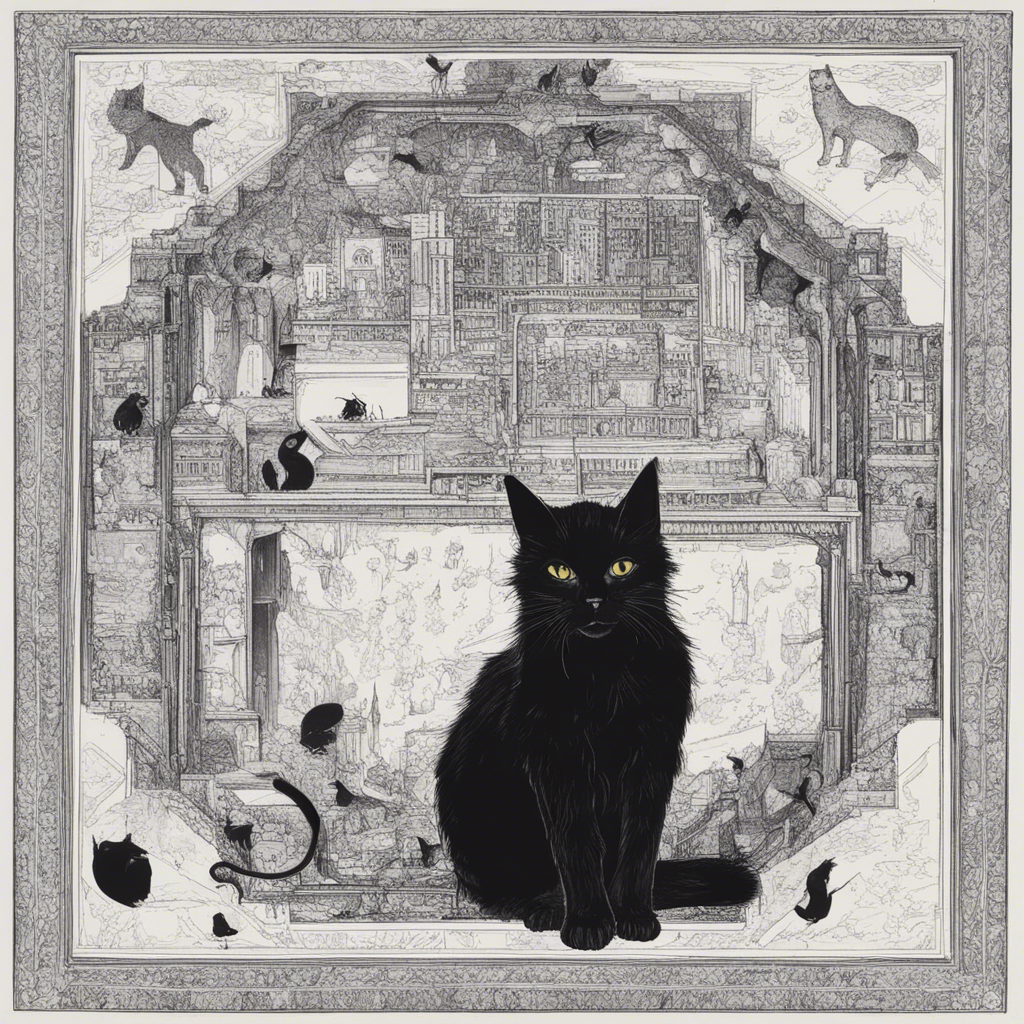

In [31]:
img

In [33]:
import requests

url = "https://img4me.p.rapidapi.com/"

querystring = {"text":"image of a cat","font":"trebuchet","size":"12","fcolor":"000000","bcolor":"FFFFFF","type":"png"}

headers = {
	"X-RapidAPI-Key": "2580d99c6emsh40ab2c099241570p1695f9jsnd1b938e71e06",
	"X-RapidAPI-Host": "img4me.p.rapidapi.com"
}

response = requests.get(url, headers=headers, params=querystring)

print(response.json())

JSONDecodeError: Expecting value: line 1 column 1 (char 0)

In [39]:
response.json.

<bound method Response.json of <Response [200]>>

In [36]:
# Load the image data into a PIL Image object
img = Image.open(BytesIO(response.content))

# Display the image (optional)
img.show()

UnidentifiedImageError: cannot identify image file <_io.BytesIO object at 0x00000297ED1915D0>

In [ ]:

const form = new FormData();
form.append('prompt', 'shot of vaporwave fashion dog in miami');

fetch('https://clipdrop-api.co/text-to-image/v1', {
method: 'POST',
headers: {
    'x-api-key': '562cc6c6b1dc8dcba069a96093877d3da8e1bc95a78ce84c5529cb3c5b78ac0bb7f70347e34fc34c9ebad8c36f5961b7',
},
body: form,
})
.then(response => response.arrayBuffer())
.then(buffer => {
// buffer here is a binary representation of the returned image
const imageUrl = URL.createObjectURL(new Blob([buffer], { type: 'image/jpeg' }));
const image = document.createElement('img');
image.src = imageUrl;
})
.catch(error => {
console.error('Erro:', error);
});

In [40]:
## webhook no make 
write a post request to https://hook.us1.make.com/1xhloneryo4j6hzvimleb2gy9risvqk9 with the following body parameters 'fullName': workflow.Name
https://www.youtube.com/watch?v=_6OsZZ4Sdkc